#**Assignment on Preprocessing**

Do the following on titanic dataset
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

**1. Load Data**

In [1]:
# importing essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data

data=pd.read_csv("/content/titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**2. Make ‘PassengerId’ as the index column**

In [3]:
data=data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**3. Check the basic details of the dataset**

In [4]:
# To check basic details of the dataset such as total number of entries in the DataFrame, number of non-null values and data type of each column
# and the memory usage information.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# To check for count of null or NaN values in each column

data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
# OR
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# To generate descriptive statistics of the numerical columns in the  Dataset.

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**4. Fill in all the missing values present in all the columns in the dataset**


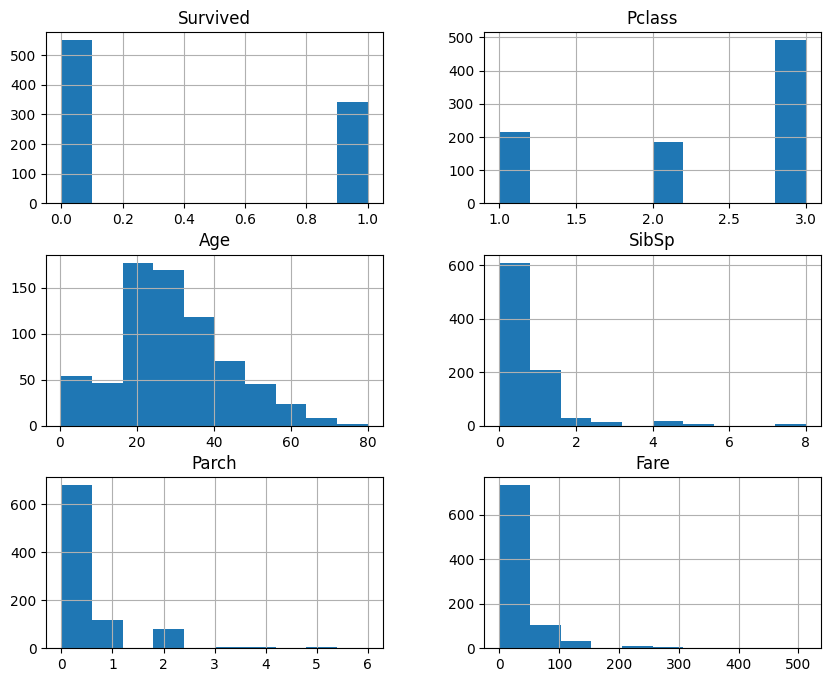

In [8]:
# To check skewness in order to determine which columns could be filled with mean or median.

data.hist(figsize=(10,8));

In [9]:
# Filling missing values in age column with mean because it follows normal.

data['Age']=data['Age'].fillna(data['Age'].mean())


In [10]:
#  TO fill missing values for Embarked.
#     checking the unique values or its count

data['Embarked'].nunique
data['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Since its a categorical variable, fill it with mode

data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
# Dropping the entire column Cabin, because more than 60 % of the observation is missing.

data.drop(['Cabin'],axis=1,inplace=True)

In [13]:
# Check whether all missing values are filled or not.

data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

**5. Check and handle outliers in at least 3 columns in the dataset**

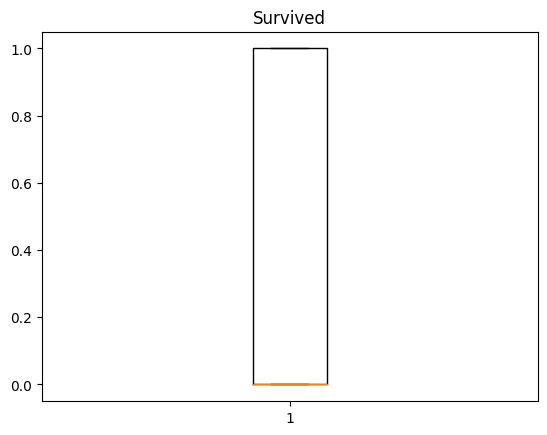

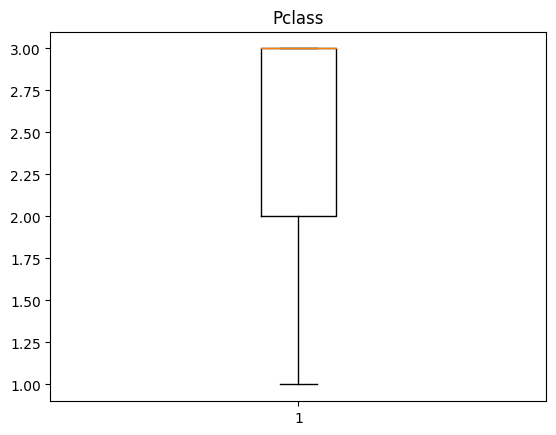

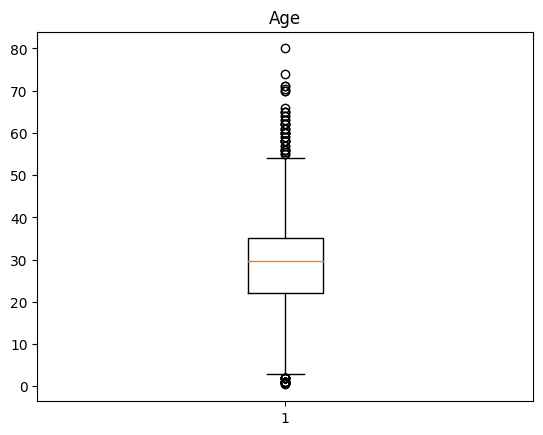

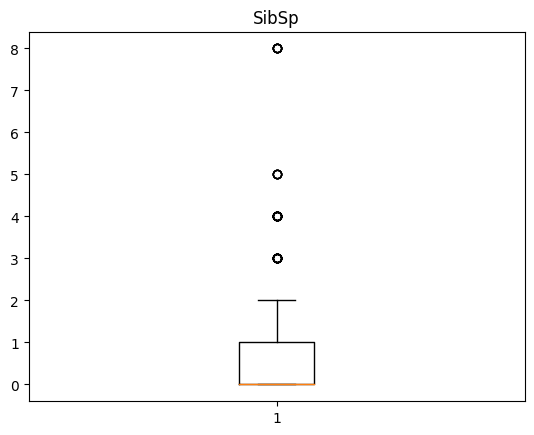

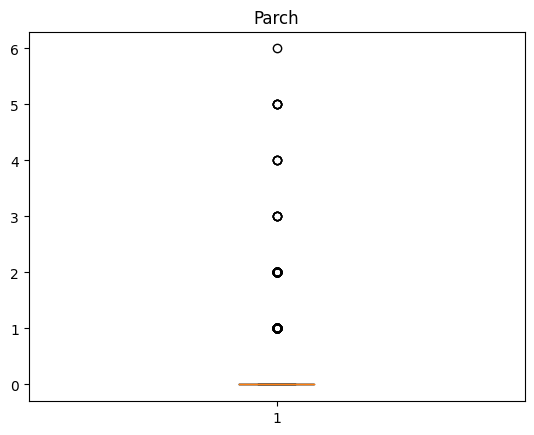

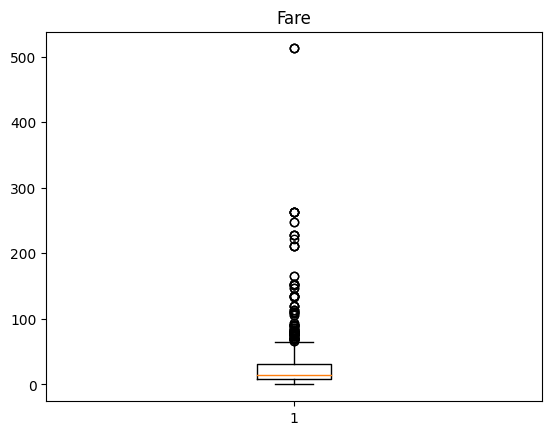

In [14]:
# Boxplot helps to find the outliers in numerical columns in the dataset

columns=data.select_dtypes(include=['int64', 'float64'])

for i in columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

From boxplot its clear that 'Age', 'SibSp', 'Parch' and 'Fare' columns have outliers.

**Fare**

In [15]:
# Identify outliers of fare using IQR method

Q1=np.percentile(data['Fare'],25,method='midpoint')
Q2=np.percentile(data['Fare'],50,method='midpoint')
Q3=np.percentile(data['Fare'],75,method='midpoint')

print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)

IQR=Q3-Q1
print('\n' "IQR is : ",IQR)

low=Q1-1.5*IQR
high= Q3+1.5*IQR

print('\n' "The lower bound is :", low)
print("The upper bound is :", high)

outlier=[]
for x in data['Fare']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print('\n',outlier)

Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0

IQR is :  23.0896

The lower bound is : -26.724
The upper bound is : 65.6344

 [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.

In [16]:
# to check the number of outliers
len(outlier)

116

In [17]:
# Replace outliers

data['Fare']=data['Fare'].clip(lower=low,upper=high)


In [18]:
# to check all outliers are replaced

outlier=[]
for x in data['Fare']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print(outlier)

[]


**Parch**

In [19]:
# Identify outliers in Parch using IQR method

Q1=np.percentile(data['Parch'],25,method='midpoint')
Q2=np.percentile(data['Parch'],50,method='midpoint')
Q3=np.percentile(data['Parch'],75,method='midpoint')

print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)

IQR=Q3-Q1
print('\n' "IQR is : ",IQR)

low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lower bound is :", low)
print("The upper bound is :", high)

outlier=[]
for x in data['Parch']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print('\n',outlier)


Q1 is : 0.0
Q2 is : 0.0
Q3 is : 0.0

IQR is :  0.0

The lower bound is : 0.0
The upper bound is : 0.0

 [1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


In [20]:
# to check the number of outliers

len(outlier)

213

In [21]:
#Replce the outliers

data['Parch']=data['Parch'].clip(lower=low,upper=high)

In [22]:
# to check whether all outliers are replaced

outlier=[]
for x in data['Parch']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print(outlier)

[]


**SibSp**

In [23]:
# Identify outliers using IQR method

Q1=np.percentile(data['SibSp'],25,method='midpoint')
Q2=np.percentile(data['SibSp'],50,method='midpoint')
Q3=np.percentile(data['SibSp'],75,method='midpoint')

print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)

IQR=Q3-Q1
print('\n' "IQR is : ",IQR)

low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lower bound is :", low)
print("The upper bound is :", high)

outlier=[]
for x in data['SibSp']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print('\n',outlier)


Q1 is : 0.0
Q2 is : 0.0
Q3 is : 1.0

IQR is :  1.0

The lower bound is : -1.5
The upper bound is : 2.5

 [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [24]:
#to check the count of outliers

len(outlier)

46

In [25]:
#Replace outliers

data['SibSp']=data['SibSp'].clip(lower=low,upper=high)

In [26]:
#Check whether the outliers are replaced

outlier=[]
for x in data['SibSp']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print(outlier)

[]


**Age**

In [27]:
# Identify outliers in age using IQR method

Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')

print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)

IQR=Q3-Q1
print('\n' "IQR is : ",IQR)

low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lower bound is :", low)
print("The upper bound is :", high)

outlier=[]
for x in data['Age']:
  if ((x<low) or (x>high)):
    outlier.append(x)

print('\n',outlier)

Q1 is : 22.0
Q2 is : 29.69911764705882
Q3 is : 35.0

IQR is :  13.0

The lower bound is : 2.5
The upper bound is : 54.5

 [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [28]:
# to get the count of outliers

len(outlier)

66

In [29]:
#Since Age is normally distributed replace the outliers using z score method

from scipy.stats import zscore

# compute z_score

z_score= zscore(data['Age'])
z_score


PassengerId
1     -0.592481
2      0.638789
3     -0.284663
4      0.407926
5      0.407926
         ...   
887   -0.207709
888   -0.823344
889    0.000000
890   -0.284663
891    0.177063
Name: Age, Length: 891, dtype: float64

In [30]:
threshold=2
outlier_index=data.index[(z_score> threshold)| (z_score< -threshold)]
len(outlier_index)

69

In [31]:
data=data.drop(outlier_index)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0.0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0.0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1.0,0,W./C. 6607,23.4500,S


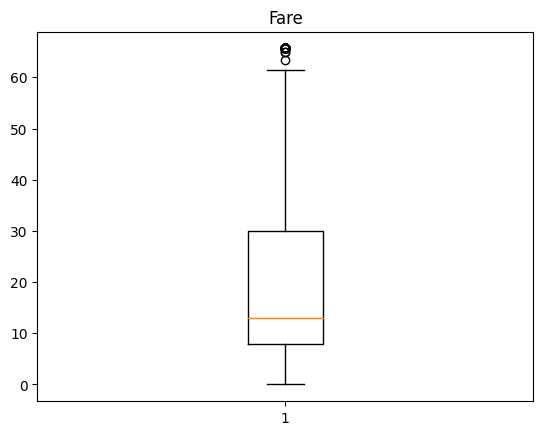

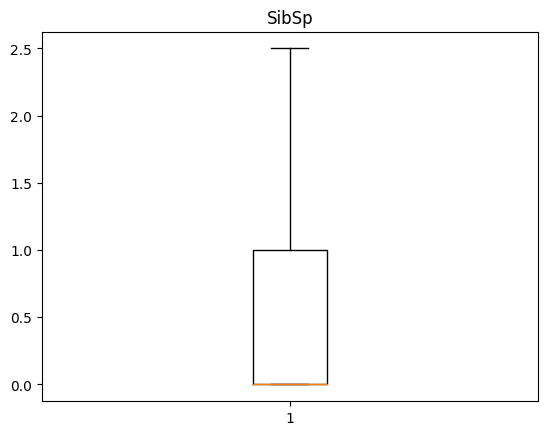

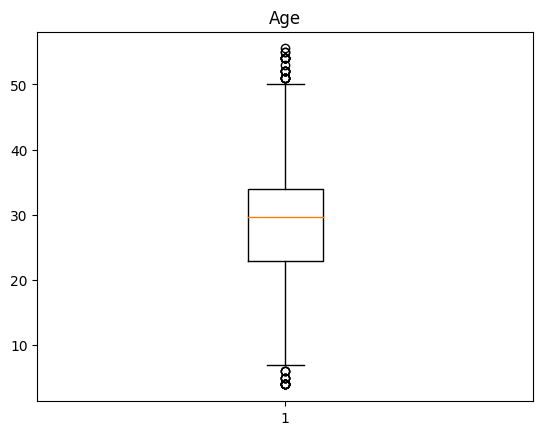

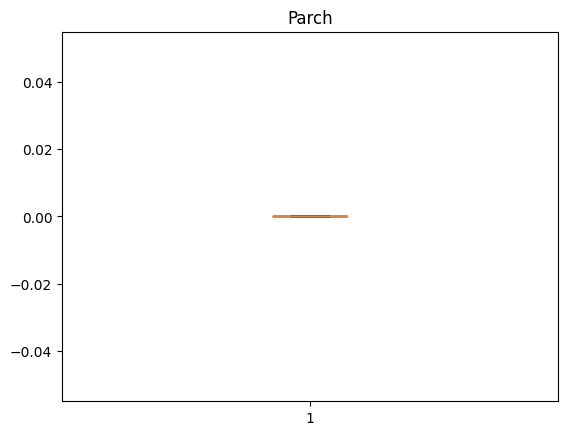

In [32]:
# Plot boxplot to cross check whether all outliers are replaced

columns=['Fare','SibSp','Age','Parch']
for i in columns:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

**6. Do min max scaling on the feature set (Take ‘Survived’ as target)**

In [33]:
# import essential libraries

from sklearn.preprocessing import MinMaxScaler

In [34]:
minmax=MinMaxScaler()

In [35]:
# Set the target variable as x and the features as y (all other numeric columns except survived).

x=data['Survived']
y=data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]]


In [36]:
#MinMax Scaling

y_mm=minmax.fit_transform(y)


In [37]:
# Converting the scaled data to Dataframe

y_mm=pd.DataFrame(y_mm)

In [38]:
y_mm.describe()

,0,1,2,3,4
count,822.000000,822.000000,822.000000,822.0,822.000000
mean,0.669708,0.488632,0.162287,0.0,0.357060
std,0.413057,0.195737,0.274607,0.0,0.311807
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.500000,0.368932,0.000000,0.0,0.120300
50%,1.000000,0.499012,0.000000,0.0,0.198067
75%,1.000000,0.582524,0.400000,0.0,0.457886
max,1.000000,1.000000,1.000000,0.0,1.000000


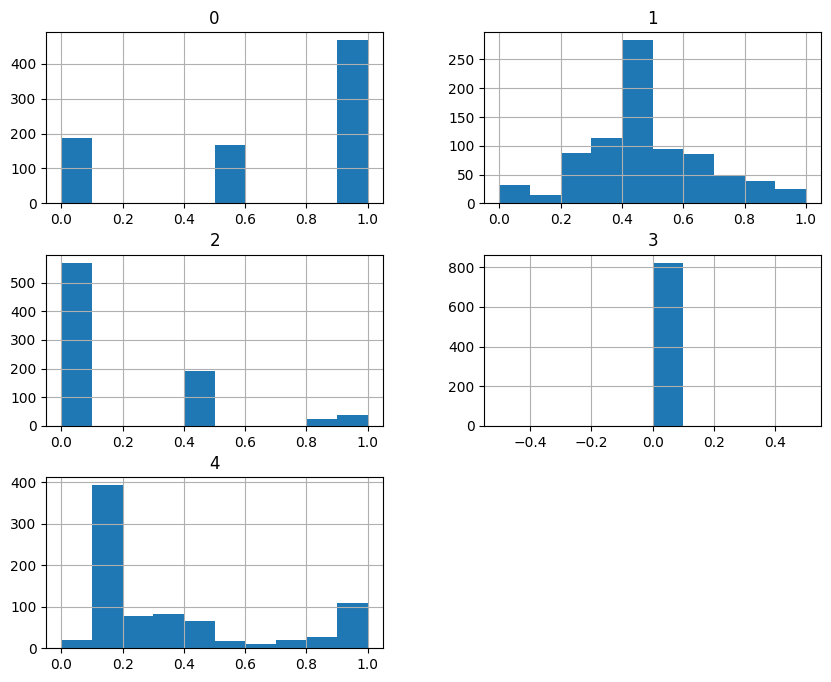

In [39]:
y_mm.hist(figsize=(10,8))
plt.show()